
# Linear Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a linear regression activity.

Workflow:



1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable* 
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [136]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.xlsx` file and show a short description

In [137]:
# This cell allows full compatibility between execution in Google Colab and in local
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

In [138]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = 'FoodUK2014.xlsx'
df0 = pd.read_excel(data_fn)
df0.head()

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
0,4,April to June,2,2,556.213795,Female,April,West Midlands,2014,985.655,34,13.745333,NaN,37.301331,96.156670,NaN,69.268333,6.995586,NaN,1.856993
1,4,July to September,2,2,737.685635,Male,August,North East,2014,824.520,38,6.045000,0.650000,30.203335,53.278336,6.500000,62.833336,8.813621,10.000000,2.080344
2,2,October to December,2,0,330.775000,Male,October,Northern Ireland,2014,271.925,54,11.780167,2.088667,17.032166,93.838333,28.491667,42.813335,7.965790,13.641079,2.513675
3,2,April to June,2,0,536.742283,Male,June,North West and Merseyside,2014,611.490,64,2.745167,NaN,4.008333,16.856667,NaN,5.416667,6.140490,NaN,1.351351
4,3,April to June,3,0,880.787157,Male,April,East Midlands,2014,496.040,64,12.857000,2.903333,7.345000,73.623337,16.921667,19.261665,5.726323,5.828358,2.622419


## Data Exploration and preparation

##### Show a short description of the columns

In [139]:
df0.describe()

,hhsize,adults_n,children_n,totalexp,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.0,5114.000000,5114.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000
mean,2.363707,1.841807,0.521901,519.898868,2014.0,679.542002,53.802698,10.475023,2.146960,25.727801,68.108342,19.635469,58.943391,7.072523,9.934257,2.508315
std,1.244704,0.743052,0.945622,411.543093,0.0,499.596175,16.187912,8.798118,2.034353,18.371345,57.347230,18.725096,44.751694,2.931651,5.485175,1.358023
min,1.000000,0.000000,0.000000,-246.916821,2014.0,0.000000,17.000000,0.086667,0.108333,0.060667,0.195000,0.000000,0.520000,0.357694,0.000000,0.159672
25%,1.000000,1.000000,0.000000,260.598783,2014.0,306.954000,41.000000,4.452500,0.866667,12.222167,29.141668,6.917083,27.148333,5.171614,5.979375,1.760525
50%,2.000000,2.000000,0.000000,426.977227,2014.0,548.086000,54.000000,8.374167,1.625000,22.245817,54.708336,13.736667,49.356667,6.575851,8.804690,2.254208
75%,3.000000,2.000000,1.000000,651.003763,2014.0,925.652500,67.000000,14.005333,2.816667,35.037167,90.480003,26.000000,78.281662,8.295746,12.520942,2.893561
max,9.000000,7.000000,7.000000,5859.877186,2014.0,2134.090000,80.000000,104.589333,41.348362,169.283829,803.465027,194.869995,480.024994,40.000000,46.315834,32.666668


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [140]:
#non null rows and columns
df0.dropna().shape

(3446, 20)

In [141]:
#show the nu,ber of null rows in the dataset.
df0.shape[0]-df0.dropna().shape[0]

1668

#### Drop rows with nulls

In [142]:
df=df0.dropna().copy()
df.shape

(3446, 20)

##### Data transormation
- Convert the alphanumeric SexHRP into numeric 0 and 1
    - the `sklearn` machine learning procedures work only with numeric predicting
      attributes
- Generate two new columns as ratio of other columns
    - this is suggested by background information

In [143]:
def numeric(x):
    if x == "Male": return 1
    if x == "Female": return 0
df["SexHRP"] = df["SexHRP"].apply(numeric)

In [144]:
df["qmeat_hhsize_ratio"] = df["qmeat"]/df["hhsize"]
df["income_hhsize_ratio"] = df["income"]/ df["hhsize"]

##### Use only the columns that the experts consider interesting
This is suggested by background information

In [145]:
important_columns = ["adults_n",	"children_n", "SexHRP",	"AgeHRP",	"qmeat_hhsize_ratio",	"income_hhsize_ratio", "uvmeat"]
drop_columns = [i for i in df.columns if i not in important_columns]
df.drop(drop_columns,inplace=True,axis=1)
df.head()

,adults_n,children_n,SexHRP,AgeHRP,uvmeat,qmeat_hhsize_ratio,income_hhsize_ratio
1,2,2,1,38,8.813621,1.511250,206.130000
2,2,0,1,54,7.965790,5.890083,135.962500
4,3,0,1,64,5.726323,4.285667,165.346667
5,2,2,1,70,8.451528,8.968250,66.632500
7,3,0,1,64,5.904745,4.079111,134.393333


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [146]:
X = df.drop(["qmeat_hhsize_ratio"],axis=1)
y = df["qmeat_hhsize_ratio"]

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

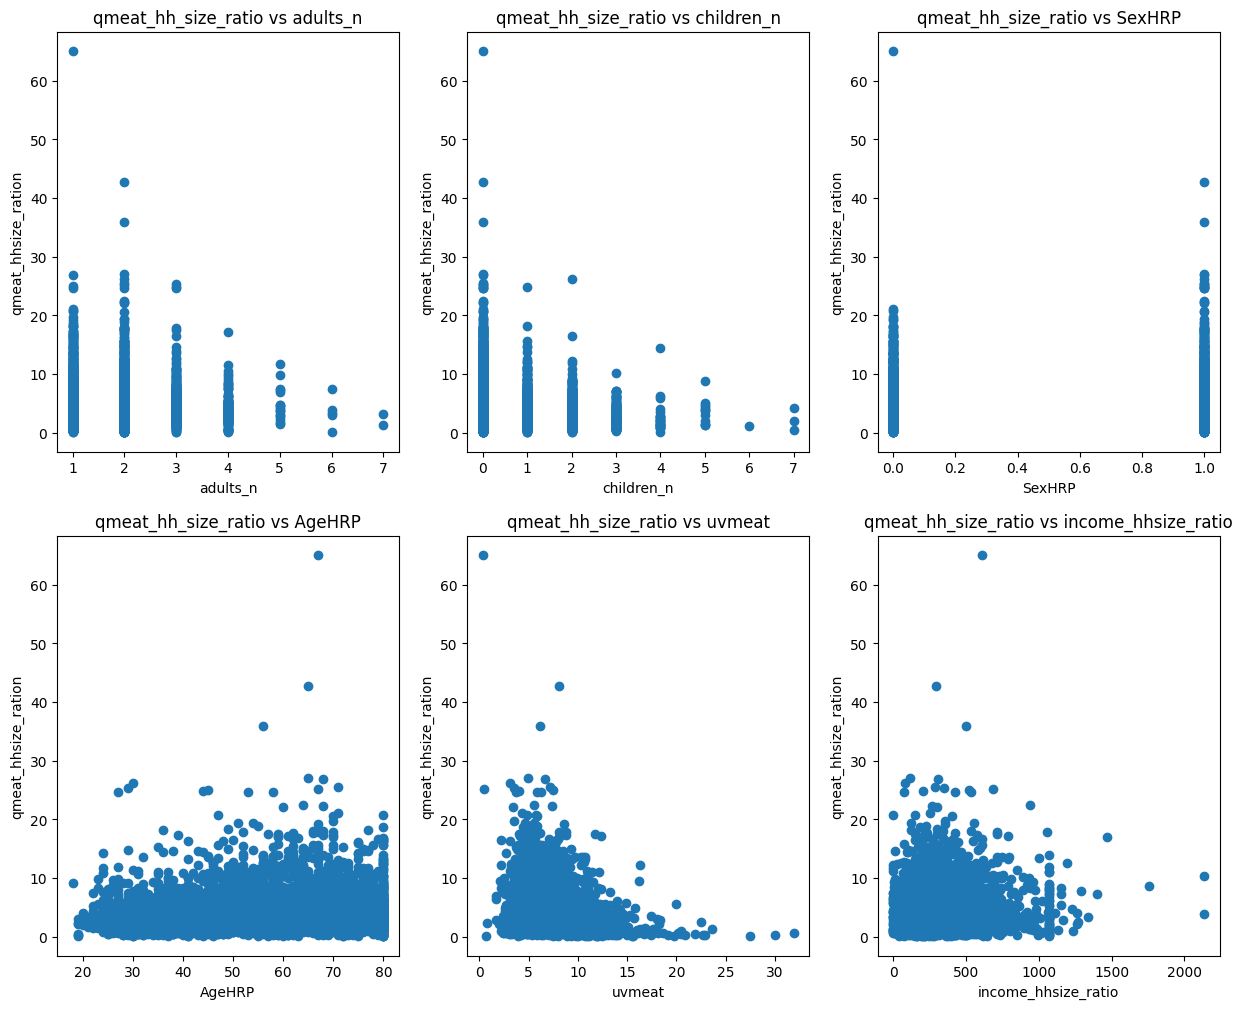

In [147]:
plt.figure(figsize=[15,12])
pos = 1
for i in X.columns:
    plt.subplot(2,3,pos)
    plt.title(f"qmeat_hh_size_ratio vs {i}")
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel("qmeat_hhsize_ration")
    pos +=1
plt.show()

### Show the *_p-values_* of the target with respect to the variables

In [148]:
from sklearn.feature_selection import f_regression
f_statistic, p_values = f_regression(X,y)
p_values_show = pd.DataFrame({"Variable": X.columns, "p_value": p_values})
p_values_show

,Variable,p_value
0,adults_n,1.415945e-05
1,children_n,1.077386e-30
2,SexHRP,8.429827e-02
3,AgeHRP,1.710126e-21
4,uvmeat,4.789746e-52
5,income_hhsize_ratio,1.211099e-03


## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [149]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,random_state= random_state, train_size = 0.7)
print('Training set and test set have {} and {} elements respectively'.format(Xtrain.shape[0],Xtest.shape[0]))

Training set and test set have 2412 and 1034 elements respectively


### Consider a reduced dataset containing the chosen variable and the target

In [150]:
pred_var= "adults_n"
Xtrain_a = Xtrain[pred_var].values.reshape(-1,1)
Xtest_a = Xtest[pred_var].values.reshape(-1,1)

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [151]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain_a,ytrain)
ytrainpred = model.predict(Xtrain_a)
ytestpred = model.predict(Xtest_a)


#### Compute the regression coefficients and the quality measures
Create a function to compute the F-statistic and p-value of the regression model

In [152]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p


#### Compute the statistical significance of the model

In [153]:

#perform F-test
f_statistic_uni, p_value_uni = f_test(ytrain, ytrainpred
                                    , Xtrain_a.shape[1], Xtrain_a.shape[0])

# The coefficient
coeff_uni = model.coef_[0] # the coefficient is returned as a one-element list
intercept_uni = model.intercept_
# The root mean squared error
rmse_uni = mean_squared_error(ytest, ytestpred, squared=False)
# Coefficient of determination = 1 is perfect prediction
r2_uni = r2_score(ytest, ytestpred)

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Univariate Linear - Value' : [intercept_uni
                        , coeff_uni
                        , rmse_uni
                        , r2_uni
                        , f_statistic_uni
                        , p_value_uni]}
            , index = ['Intercept for "{}"'.format(pred_var)
                     , 'Coefficient for "{}"'.format(pred_var)
                     , 'rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])

,Univariate Linear - Value
"Intercept for ""adults_n""",5.646984
"Coefficient for ""adults_n""",-0.326893
rmse,3.886323
r2,0.007595
f-statistic,9.841162
p-value,0.001727


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [154]:
model2 = LinearRegression()
model2.fit(Xtrain,ytrain)
ytrain_pred2 = model2.predict(Xtrain)
ytest_pred2 = model2.predict(Xtest)


### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [155]:

pd.DataFrame({"Variable": X.columns, "Coefficient":model2.coef_})

,Variable,Coefficient
0,adults_n,-0.318682
1,children_n,-0.650924
2,SexHRP,0.383162
3,AgeHRP,0.014913
4,uvmeat,-0.392620
5,income_hhsize_ratio,0.000989


#### Compute the statistical significance

In [156]:
f_statistics, p_values = f_regression(Xtrain,ytrain_pred2)
pd.DataFrame({"variables": X.columns,"p-values":p_values})

,variables,p-values
0,adults_n,4.812836e-19
1,children_n,1.384315e-188
2,SexHRP,5.806116e-10
3,AgeHRP,3.199609e-119
4,uvmeat,0.000000e+00
5,income_hhsize_ratio,6.460728e-08


#### Compute the quality measures

In [160]:
# The root mean squared error
rmse= mean_squared_error(ytest, ytest_pred2, squared=False)

# Coefficient of determination = 1 is perfect prediction
r2 = r2_score(ytest, ytest_pred2)

#perform F-test
f_statistic_multiple, p_value_multiple = f_test(ytrain, ytrain_pred2 , Xtrain.shape[1], Xtrain.shape[0])

pd.DataFrame({'Multivariate Linear - Value' : [
                        rmse
                        , r2
                        , f_statistic_multiple
                        , p_value_multiple]}
            , index = ['rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value']).style.format(precision = 4)

,Multivariate Linear - Value
rmse,3.6651
r2,0.1173
f-statistic,57.4179
p-value,0.0000


## Decision Tree Multivariate Regresson

In [158]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [164]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(Xtrain,ytrain)
max_depth = DecisionTree.get_depth()
print("The maximum depth of the ful Decision Tree Regressor is :",max_depth)

The maximum depth of the ful Decision Tree Regressor is : 34


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [173]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth" : list(range(1,max_depth))}
dt_gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state),param_grid = param_grid, scoring="neg_mean_squared_error")
dt_gscv.fit(Xtrain,ytrain)
dt_best = dt_gscv.best_estimator_
best_max_depth = dt_best.tree_.max_depth
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))


The optimal maximum depth for the decision tree is 2


In [174]:
# Make predictions using the test set
y_test_pred_dt = dt_best.predict(Xtest)

rmse_dt = mean_squared_error(ytest, y_test_pred_dt, squared=False)

print("Decision Tree Regression - RMSE = {:.2f}".format(rmse_dt))

Decision Tree Regression - RMSE = 3.79


#### Show the tree

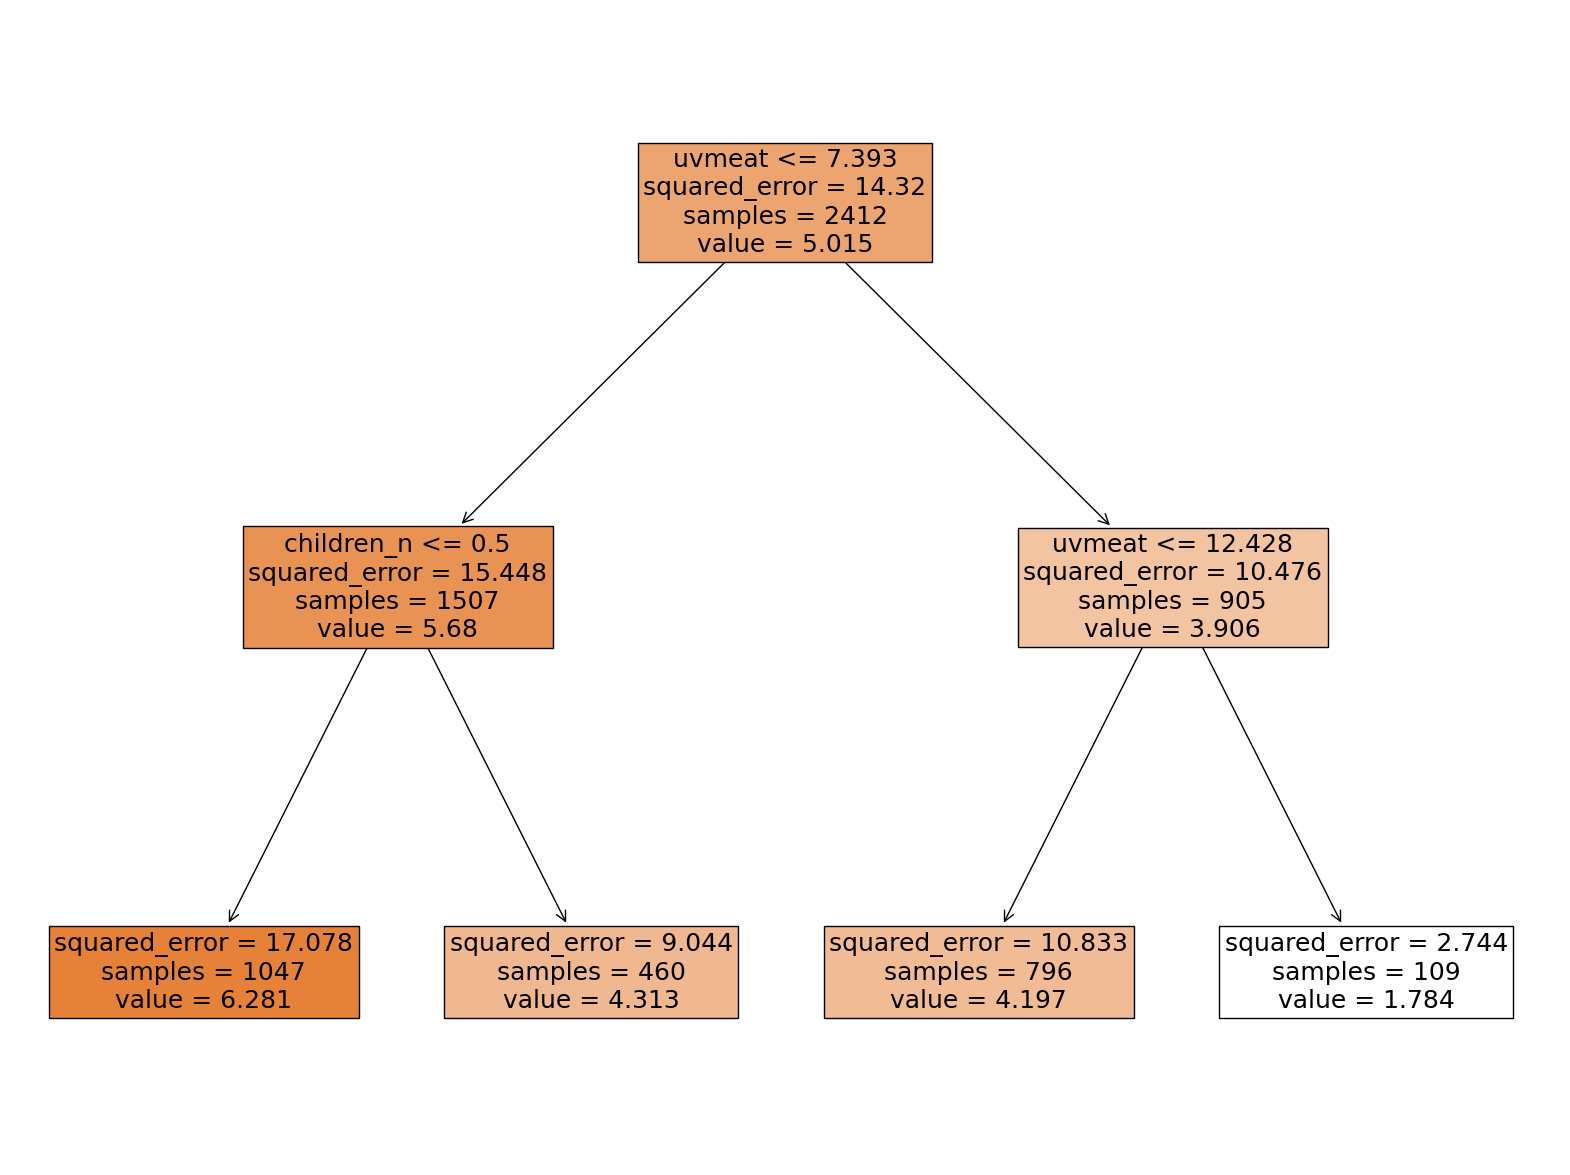

In [175]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize = (20,15))
plot_tree(dt_best, filled = True # fills nodes with colors related to classes
                          # darker color means higher purity
          , feature_names = X.columns
          # , max_depth=2
          , fontsize=18
        #   , class_names = df[target].unique()
         );

## Random Forest Multivariate Regresson
Create a Random forest regressor and fit it on the complete dataset.

For simplicity use the max_depth found in the Decision tree regressor to perform a cross validation and find the best depth for this model.

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = random_state)
param_grid_rf = {"max_depth": list(range(1,max_depth))}

# create the grid search with cross validation
rf_gscv = GridSearchCV(rf, param_grid=param_grid_rf
                        , scoring='neg_mean_squared_error') # look for minimum mean square error

# Train the model using the training set
rf_gscv.fit(Xtrain, ytrain)

# the grid search returns the best estimator
rf = rf_gscv.best_estimator_

In [177]:
print("The optimal maximum depth for the trees in the random forest is {}".format(rf.max_depth))

The optimal maximum depth for the trees in the random forest is 4


In [179]:
y_test_pred_rf = rf.predict(Xtest)
rmse_rf = mean_squared_error(ytest, y_test_pred_rf, squared=False)
print("Random Forest Regression - RMSE = {:.2f}".format(rmse_rf))

Random Forest Regression - RMSE = 3.58


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models
### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression


## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with the other two columns and comment the results